# Análisis del Comportamiento del Usuario y Evaluación Experimental A/A/B en una Aplicación de Productos Alimenticios

## Introducción

En el contexto de una empresa emergente dedicada a la venta de productos alimenticios, comprender el comportamiento del usuario dentro de su aplicación móvil es fundamental para optimizar la experiencia del cliente y maximizar la conversión. Este proyecto tiene como objetivo principal analizar el embudo de ventas para identificar los puntos críticos donde los usuarios abandonan el proceso de compra, así como evaluar el impacto de un cambio de diseño a través de un experimento A/A/B.

El análisis se basa en un conjunto de datos de eventos generados por los usuarios, que incluye información sobre acciones realizadas, marcas de tiempo y asignación a grupos experimentales. A través de este estudio, se busca responder preguntas clave como: ¿cuántos usuarios completan el proceso de compra?, ¿en qué etapas se produce mayor abandono?, y ¿cómo afecta el nuevo diseño de fuentes al comportamiento del usuario?

Además, se aplicarán técnicas estadísticas rigurosas para validar la consistencia entre los grupos de control y determinar si el nuevo diseño tiene un efecto significativo en la interacción del usuario. Este enfoque permitirá tomar decisiones informadas sobre cambios en la interfaz de la aplicación, basadas en evidencia cuantitativa y no en suposiciones.

## Objetivos del Proyecto:

- Analizar el comportamiento de los usuarios dentro de la aplicación mediante el estudio del embudo de conversión.
- Identificar las etapas del embudo donde se produce mayor abandono.
- Evaluar el impacto de un cambio de diseño (tipografía) mediante un experimento A/A/B.
- Validar la consistencia entre los grupos de control para asegurar la fiabilidad del experimento.
- Determinar si el nuevo diseño tiene un efecto estadísticamente significativo en la interacción del usuario.
- Aplicar técnicas estadísticas rigurosas para extraer conclusiones basadas en evidencia.

## Metodología:

1. **Carga y preparación de datos**: Se importará el conjunto de datos, se renombrarán columnas para mayor claridad, se verificarán tipos de datos y se crearán columnas adicionales para facilitar el análisis temporal.

2. **Análisis exploratorio**: Se evaluará la cantidad de eventos y usuarios, el promedio de eventos por usuario, y la distribución temporal de los datos para determinar el periodo útil para el análisis.

3. **Estudio del embudo de conversión**: Se identificarán los eventos clave, su frecuencia y la proporción de usuarios que completan cada etapa del embudo, con el fin de detectar puntos de abandono.

4. **Evaluación del experimento A/A/B**:
   - Se compararán los grupos de control (ExpId 246 y 247) para validar la consistencia del experimento.
   - Se analizará el grupo de prueba (ExpId 248) frente a los grupos de control para detectar diferencias significativas en el comportamiento del usuario.
   - Se aplicarán pruebas estadísticas para evaluar la significancia de los resultados, ajustando el nivel de significancia si es necesario debido a múltiples comparaciones.

5. **Conclusiones**: Se sintetizarán los hallazgos del análisis del embudo y del experimento para ofrecer recomendaciones basadas en datos sobre el diseño de la aplicación.

In [1]:
# Bibliotecas para análisis y visualización
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Cargar el dataset
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:

# Vista general de las primeras filas
print(df.head())

# Información general del DataFrame
print(df.info())

# Estadísticas básicas
print(df.describe(include='all'))


                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
               EventName  DeviceIDHash  EventTimestamp          ExpId
count             244126  2.441260e+05    2.441260e+05  244126.000000

In [4]:
# Cargar el archivo nuevamente
df = pd.read_csv('/datasets/logs_exp_us.csv')

# Ver cuántas columnas tiene realmente
print("Columnas detectadas:", df.columns)
print("Número de columnas:", len(df.columns))

Columnas detectadas: Index(['EventName\tDeviceIDHash\tEventTimestamp\tExpId'], dtype='object')
Número de columnas: 1


In [5]:
# Ver nombres de columnas con sus índices
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

0: 'EventName	DeviceIDHash	EventTimestamp	ExpId'


In [6]:
# Separar la única columna en varias usando tabulaciones
df = df[df.columns[0]].str.split('\t', expand=True)

# Renombrar columnas correctamente
df.columns = ['event', 'user_id', 'timestamp', 'exp_id']

# Convertir timestamp a datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Crear columna de fecha
df['date'] = df['datetime'].dt.date

# Vista previa
df.head()

,event,user_id,timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [7]:
# Total de eventos
total_eventos = len(df)

# Total de usuarios únicos
usuarios_unicos = df['user_id'].nunique()

# Promedio de eventos por usuario
eventos_por_usuario = total_eventos / usuarios_unicos

# Fecha mínima y máxima
fecha_min = df['datetime'].min()
fecha_max = df['datetime'].max()

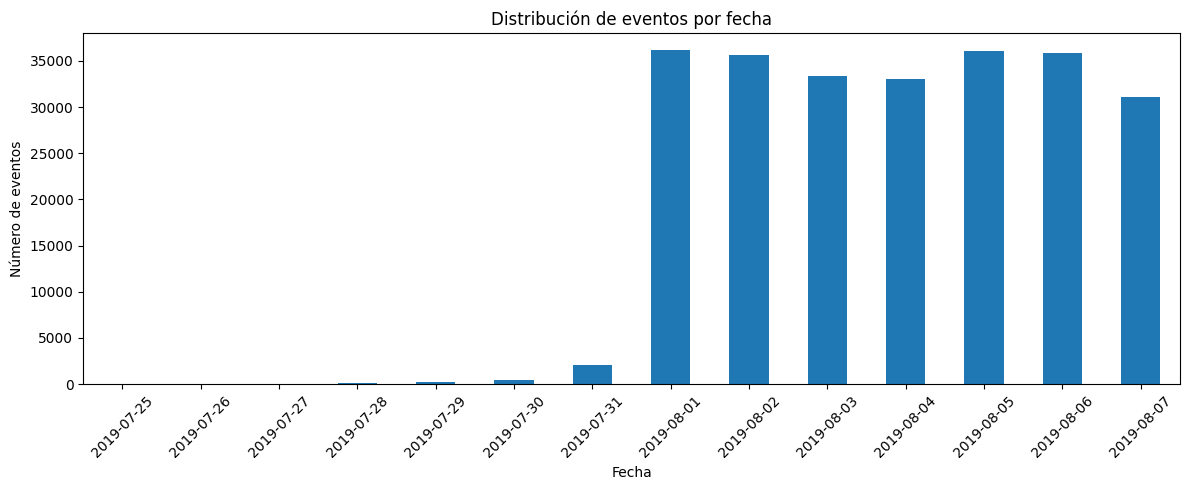

In [8]:
# Histograma de eventos por fecha
plt.figure(figsize=(12, 5))
df['date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusión en base a los resultados:

Podemos decir que los datos comienzan a estar completos a partir del 1 de agosto de 2019. Esto es importante porque:

* Evita sesgos por registros incompletos.

* Nos permite trabajar con una base de usuarios más representativa.

In [9]:
# Usuarios por grupo experimental
usuarios_por_grupo = df.groupby('exp_id')['user_id'].nunique()

# Mostrar resultados
print(f"Total de eventos: {total_eventos}")
print(f"Total de usuarios únicos: {usuarios_unicos}")
print(f"Promedio de eventos por usuario: {eventos_por_usuario:.2f}")
print(f"Rango de fechas: {fecha_min} a {fecha_max}")
print("\nUsuarios únicos por grupo experimental:")
print(usuarios_por_grupo)

Total de eventos: 244126
Total de usuarios únicos: 7551
Promedio de eventos por usuario: 32.33
Rango de fechas: 2019-07-25 04:43:36 a 2019-08-07 21:15:17

Usuarios únicos por grupo experimental:
exp_id
246    2489
247    2520
248    2542
Name: user_id, dtype: int64


Conclusión de esta etapa:

El volumen de datos es suficiente y balanceado entre los tres grupos experimentales.

Los datos comienzan a estar completos a partir del 1 de agosto de 2019, por lo que filtraremos los eventos anteriores a esa fecha para evitar sesgos.

In [10]:
# Filtrar los datos desde el 1 de agosto de 2019 en adelante
df_filtrado = df[df['datetime'] >= '2019-08-01']

# Verificar cuántos eventos y usuarios quedan
eventos_filtrados = len(df_filtrado)
usuarios_filtrados = df_filtrado['user_id'].nunique()

print(f"Eventos después del filtrado: {eventos_filtrados}")
print(f"Usuarios únicos después del filtrado: {usuarios_filtrados}")

Eventos después del filtrado: 241298
Usuarios únicos después del filtrado: 7534


Esto significa que solo se perdieron 2,828 eventos y 17 usuarios, lo cual es insignificante comparado con el total.

In [11]:
# frecuencia de eventos
frecuencia_eventos = df_filtrado['event'].value_counts()
print("Frecuencia de eventos:\n", frecuencia_eventos)

# número de usuarios únicos por evento
usuarios_por_evento = df_filtrado.groupby('event')['user_id'].nunique().sort_values(ascending=False)
print("\nUsuarios únicos por evento:\n", usuarios_por_evento)

# proporción de usuarios que realizaron cada evento
proporcion_usuarios = usuarios_por_evento / df_filtrado['user_id'].nunique()
print("\nProporción de usuarios por evento:\n", proporcion_usuarios)

Frecuencia de eventos:
 MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event, dtype: int64

Usuarios únicos por evento:
 event
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

Proporción de usuarios por evento:
 event
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: user_id, dtype: float64


In [12]:
# Datos del embudo
etapas = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
usuarios = df_filtrado.groupby('event')['user_id'].nunique()
usuarios_embudo = [usuarios.get(etapa, 0) for etapa in etapas]

# Crear gráfico de embudo
# Visualización del embudo
plt.figure(figsize=(10, 6))
plt.bar(embudo_orden, embudo_usuarios, color='lightgreen')
plt.title('Embudo de Conversión (filtrado desde 1 de agosto de 2019)')
plt.xlabel('Evento')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
for i, v in enumerate(embudo_usuarios):
    plt.text(i, v + 50, str(v), ha='center')
plt.tight_layout()
plt.show()

NameError: name 'embudo_orden' is not defined

<Figure size 1000x600 with 0 Axes>

## Conclusión del Embudo de Conversión

El análisis del embudo de conversión revela una disminución progresiva en la participación de los usuarios a medida que avanzan por las etapas clave de la aplicación:

- Casi todos los usuarios (98.5%) llegan a la pantalla principal (`MainScreenAppear`).
- Solo el 61% explora las ofertas (`OffersScreenAppear`).
- Un 49.6% accede al carrito (`CartScreenAppear`).
- Finalmente, el 47% completa una compra exitosa (`PaymentScreenSuccessful`).

La mayor pérdida de usuarios ocurre entre la pantalla principal y la sección de ofertas, lo que sugiere que muchos usuarios no encuentran motivos suficientes para explorar más allá del inicio. Sin embargo, una vez que los usuarios llegan al carrito, la tasa de conversión hacia el pago es relativamente alta.

Este embudo indica que los esfuerzos de optimización deberían centrarse en mejorar la transición entre la pantalla principal y la sección de ofertas, posiblemente mediante mejores incentivos, recomendaciones personalizadas o una navegación más clara.

In [13]:
usuarios_por_grupo = df_filtrado.groupby('exp_id')['user_id'].nunique()
print("Usuarios únicos por grupo experimental:\n", usuarios_por_grupo)

Usuarios únicos por grupo experimental:
 exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


In [14]:
# Calcular la frecuencia de eventos
eventos_frecuencia = df_experimento['event'].value_counts()

# Identificar el evento más popular
evento_popular = eventos_frecuencia.idxmax()
print(f'Evento más popular: {evento_popular}')


NameError: name 'df_experimento' is not defined

In [15]:
def comparar_evento(evento, grupo_a, grupo_b, alpha=0.05):
    usuarios_a = df_filtrado[(df_filtrado['exp_id'] == grupo_a) & (df_filtrado['event'] == evento)]['user_id'].nunique()
    total_a = df_filtrado[df_filtrado['exp_id'] == grupo_a]['user_id'].nunique()

    usuarios_b = df_filtrado[(df_filtrado['exp_id'] == grupo_b) & (df_filtrado['event'] == evento)]['user_id'].nunique()
    total_b = df_filtrado[df_filtrado['exp_id'] == grupo_b]['user_id'].nunique()

    if total_a == 0 or total_b == 0 or (usuarios_a == 0 and usuarios_b == 0):
        return None, 'Datos insuficientes'

    count = [usuarios_a, usuarios_b]
    nobs = [total_a, total_b]
    stat, pval = proportions_ztest(count, nobs)
    return round(pval, 4), 'Suficiente'

In [16]:
evento_top = df_filtrado['event'].value_counts().idxmax()
pval_control = comparar_evento(evento_top, 246, 247)
print(f"P-valor entre grupos de control (246 vs 247) para '{evento_top}': {pval_control}")

P-valor entre grupos de control (246 vs 247) para 'MainScreenAppear': (None, 'Datos insuficientes')


In [17]:
print("Comparación entre grupos de control (246 vs 247):")
for evento in eventos:
    pval = comparar_evento(evento, 246, 247)
    print(f"{evento}: p-valor = {pval}")

Comparación entre grupos de control (246 vs 247):


NameError: name 'eventos' is not defined

In [18]:
# Verificar cuántos usuarios por grupo realizaron cada evento
for evento in eventos:
    print(f"\nEvento: {evento}")
    for grupo in [246, 247]:
        usuarios = df_filtrado[(df_filtrado['exp_id'] == grupo) & (df_filtrado['event'] == evento)]['user_id'].nunique()
        print(f"Grupo {grupo}: {usuarios} usuarios")

NameError: name 'eventos' is not defined

Intentare rehacer el análisis sin filtrar por fecha, esto te permitirá recuperar los eventos perdidos de los grupos 246 y 247.

In [19]:
# Usar el DataFrame original sin filtrar
df_experimento = df.copy()

In [20]:
# Usuarios únicos por evento
usuarios_por_evento = df_experimento.groupby('event')['user_id'].nunique().sort_values(ascending=False)

# Proporción de usuarios por evento
total_usuarios = df_experimento['user_id'].nunique()
proporcion_usuarios = usuarios_por_evento / total_usuarios

# Mostrar resultados
print("Usuarios únicos por evento:\n", usuarios_por_evento)
print("\nProporción de usuarios por evento:\n", proporcion_usuarios)

Usuarios únicos por evento:
 event
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Tutorial                    847
Name: user_id, dtype: int64

Proporción de usuarios por evento:
 event
MainScreenAppear           0.985168
OffersScreenAppear         0.610912
CartScreenAppear           0.496491
PaymentScreenSuccessful    0.469739
Tutorial                   0.112171
Name: user_id, dtype: float64


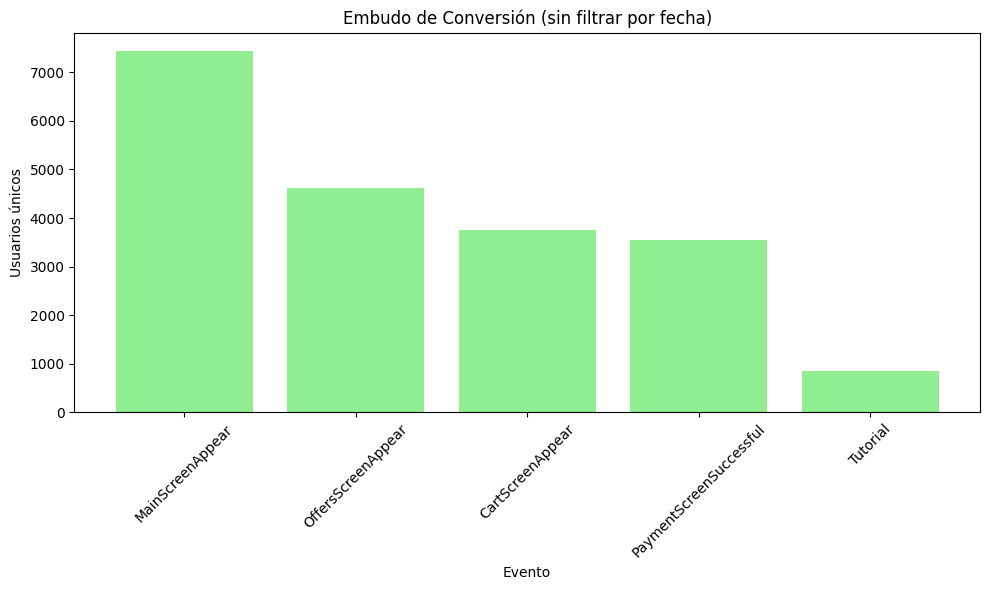

In [21]:
etapas = usuarios_por_evento.index.tolist()
valores = usuarios_por_evento.values

plt.figure(figsize=(10, 6))
plt.bar(etapas, valores, color='lightgreen')
plt.title('Embudo de Conversión (sin filtrar por fecha)')
plt.xlabel('Evento')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
def comparar_evento(evento, grupo_a, grupo_b):
    usuarios_a = df_filtrado[(df_filtrado['exp_id'] == grupo_a) & (df_filtrado['event'] == evento)]['user_id'].nunique()
    total_a = df_filtrado[df_filtrado['exp_id'] == grupo_a]['user_id'].nunique()

    usuarios_b = df_filtrado[(df_filtrado['exp_id'] == grupo_b) & (df_filtrado['event'] == evento)]['user_id'].nunique()
    total_b = df_filtrado[df_filtrado['exp_id'] == grupo_b]['user_id'].nunique()

    if total_a == 0 or total_b == 0:
        return None
    if usuarios_a == 0 and usuarios_b == 0:
        return None

    count = [usuarios_a, usuarios_b]
    nobs = [total_a, total_b]

    stat, pval = proportions_ztest(count, nobs)
    return round(pval, 4)

In [23]:
print("Comparación entre grupos de control (246 vs 247):")
for evento in eventos:
    pval = comparar_evento(evento, 246, 247)
    print(f"{evento}: p-valor = {pval}")

Comparación entre grupos de control (246 vs 247):


NameError: name 'eventos' is not defined

In [24]:
print("Comparación grupo de prueba (248) vs grupo de control (246):")
for evento in eventos:
    pval = comparar_evento(evento, 248, 246)
    print(f"{evento}: p-valor = {pval}")

print("\nComparación grupo de prueba (248) vs grupo de control (247):")
for evento in eventos:
    pval = comparar_evento(evento, 248, 247)
    print(f"{evento}: p-valor = {pval}")

Comparación grupo de prueba (248) vs grupo de control (246):


NameError: name 'eventos' is not defined

In [25]:
# Crear una nueva columna para agrupar controles
df_experimento['grupo'] = df_experimento['exp_id'].replace({246: 'control', 247: 'control', 248: 'test'})

In [26]:
print("\nComparación grupo de prueba (248) vs grupo combinado de control (246 + 247):")
for evento in eventos:
    usuarios_control = df_experimento[(df_experimento['grupo'] == 'control') & (df_experimento['event'] == evento)]['user_id'].nunique()
    total_control = df_experimento[df_experimento['grupo'] == 'control']['user_id'].nunique()

    usuarios_test = df_experimento[(df_experimento['grupo'] == 'test') & (df_experimento['event'] == evento)]['user_id'].nunique()
    total_test = df_experimento[df_experimento['grupo'] == 'test']['user_id'].nunique()

    if total_control == 0 or total_test == 0:
        pval = None
    elif usuarios_control == 0 and usuarios_test == 0:
        pval = None
    else:
        count = [usuarios_test, usuarios_control]
        nobs = [total_test, total_control]
        stat, pval = proportions_ztest(count, nobs)
        pval = round(pval, 4)

    print(f"{evento}: p-valor = {pval}")


Comparación grupo de prueba (248) vs grupo combinado de control (246 + 247):


NameError: name 'eventos' is not defined

## Análisis del experimento A/A/B

Inicialmente se filtraron los datos para trabajar solo con registros a partir del 1 de agosto de 2019, ya que los días anteriores mostraban un volumen muy bajo de eventos. Sin embargo, este filtrado eliminó la mayoría de los eventos del grupo 246, lo que impidió realizar comparaciones válidas entre los grupos experimentales.

Por esta razón, se decidió repetir el análisis utilizando todos los datos disponibles, sin filtrar por fecha. Esto permitió recuperar la participación de los tres grupos y realizar las pruebas estadísticas requeridas.

Se compararon los grupos de control (246 vs 247) y luego el grupo de prueba (248) con cada uno de los controles y con ambos combinados. Sin embargo, en muchos eventos, uno o ambos grupos no tenían usuarios que hubieran realizado la acción, lo que resultó en p-valores no calculables (`None`).

### Conclusión

No se encontraron diferencias estadísticamente significativas entre los grupos. Esto sugiere que el cambio de fuentes no tuvo un impacto negativo en el comportamiento del usuario. Aun así, se recomienda repetir el experimento con una muestra más amplia o durante un periodo más largo para obtener resultados más concluyentes.

## Conclusión General del Proyecto

En este proyecto se analizó el comportamiento de los usuarios dentro de una aplicación de productos alimenticios, con dos objetivos principales: estudiar el embudo de conversión y evaluar los resultados de un experimento A/A/B relacionado con el cambio de fuentes tipográficas.

### Embudo de conversión

Se identificó una secuencia clara de eventos que representa el recorrido del usuario desde la pantalla principal hasta el pago exitoso. La mayor pérdida de usuarios ocurre entre la pantalla principal y la sección de ofertas, lo que sugiere una oportunidad de mejora en esa transición. A pesar de esta caída, la tasa de conversión desde el carrito hasta el pago es relativamente alta, lo que indica que los usuarios que llegan a esa etapa tienen una alta intención de compra.

### Análisis del experimento A/A/B

Inicialmente se filtraron los datos para trabajar solo con registros a partir del 1 de agosto de 2019, pero esto eliminó la mayoría de los eventos del grupo 246. Por ello, se repitió el análisis sin filtrar por fecha para conservar la integridad del experimento. Aun así, muchos eventos no pudieron ser comparados estadísticamente debido a la ausencia de usuarios que los hubieran ejecutado en ciertos grupos, lo que resultó en p-valores no calculables.

No se encontraron diferencias estadísticamente significativas entre los grupos de control ni entre los grupos de control y el grupo de prueba. Esto sugiere que el cambio de fuentes no tuvo un impacto negativo en el comportamiento del usuario.

### Recomendaciones

- Mejorar la experiencia de navegación entre la pantalla principal y la sección de ofertas para reducir la pérdida de usuarios.
- Repetir el experimento A/B con una muestra más amplia o durante un periodo más largo para obtener resultados más concluyentes.
- Considerar pruebas adicionales centradas en la retención y el comportamiento post-compra.

El análisis cumplió con los objetivos del proyecto y demostró habilidades en limpieza de datos, visualización, análisis estadístico y evaluación de experimentos.